# British Airways Customer Booking Analysis

### In this project, I developed a predictive model using British Airways customer booking data to identify key behaviors that signal whether a customer will complete a holiday booking. Through structured data preparation and machine learning, I evaluated model performance and analyzed the influence of individual variables. The goal was not only to forecast booking outcomes but also to generate actionable insights that British Airways could use to improve customer engagement, optimize marketing strategies, and increase booking conversions.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

## Random Forest

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

In [10]:
data.dropna()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [11]:
data.isnull().sum() # check to see that there is no missing or null values

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

###  For example, we may be interested in how the lead time between booking and departure (purchase_lead) affects booking completion.

In [12]:
# Define features (X) and target (y)
X = df[['purchase_lead']]  # Only using purchase_lead for this example
y = df['booking_complete']

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Instantiate RandomForestClassifier (adjust parameters as needed)
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

In [15]:
# Fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [16]:
# Feature importances
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [1.]


In [17]:
# Predict on test set
y_pred = rf_model.predict(X_test)

In [18]:
# With an accuracy of 0.85, the model suggests that purchase_lead is strongly correlated with booking completion.

### Say I want to see if 'purchase_lead','num_passengers','flight_hour','flight_day','trip_type','route','sales_channel' has any effect on booking_complete.

In [19]:
# Select relevant features and target variable
X = df[['purchase_lead', 'num_passengers', 'flight_hour', 'flight_day', 'trip_type', 'route', 'sales_channel', 
        'length_of_stay', 'flight_duration', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 
        'wants_in_flight_meals']]
y = df['booking_complete']

In [20]:
X = pd.get_dummies(X, columns=['flight_day', 'trip_type', 'route', 'sales_channel','flight_duration', 'booking_origin'], drop_first=True)

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Instantiate RandomForestClassifier (adjust parameters as needed)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [23]:
# Fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Evaluate the model
accuracy = rf_model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.854


In [25]:
#With a accuracy of 0.85, purchase_lead','num_passengers','flight_hour','flight_day','trip_type and purchase_lead are correlated.

## Feature Importances

In [26]:
# Assuming X is your training DataFrame
model = RandomForestClassifier()
model.fit(X, y)  # Use your real features and target

# Now get importances and features
importances = model.feature_importances_
features = X.columns

# Construct the DataFrame
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})

# Ensure feature is string type
feature_importances['feature'] = feature_importances['feature'].astype(str)

# Extract the base feature name
feature_importances['base_feature'] = feature_importances['feature'].str.extract(r'^([a-zA-Z]+)', expand=False)

# Group by base feature and sum importance
grouped = feature_importances.groupby('base_feature')['importance'].sum().reset_index()
grouped = grouped.sort_values('importance', ascending=False)

# Optional: display
print(grouped.head())


  base_feature  importance
1       flight    0.274214
5        route    0.227076
4     purchase    0.156674
2       length    0.117170
0      booking    0.100346


In [27]:
print("Feature importances DataFrame:")
print(feature_importances)
print("Length of feature_names:", len(X_train.columns))
print("Length of importances:", len(importances))

Feature importances DataFrame:
                                 feature  importance base_feature
0                          purchase_lead    0.156674     purchase
1                         num_passengers    0.050112          num
2                            flight_hour    0.130795       flight
3                         length_of_stay    0.117170       length
4                    wants_extra_baggage    0.017989        wants
..                                   ...         ...          ...
932  booking_origin_United Arab Emirates    0.000208      booking
933        booking_origin_United Kingdom    0.000887      booking
934         booking_origin_United States    0.002008      booking
935               booking_origin_Vanuatu    0.000075      booking
936               booking_origin_Vietnam    0.002331      booking

[937 rows x 3 columns]
Length of feature_names: 937
Length of importances: 937


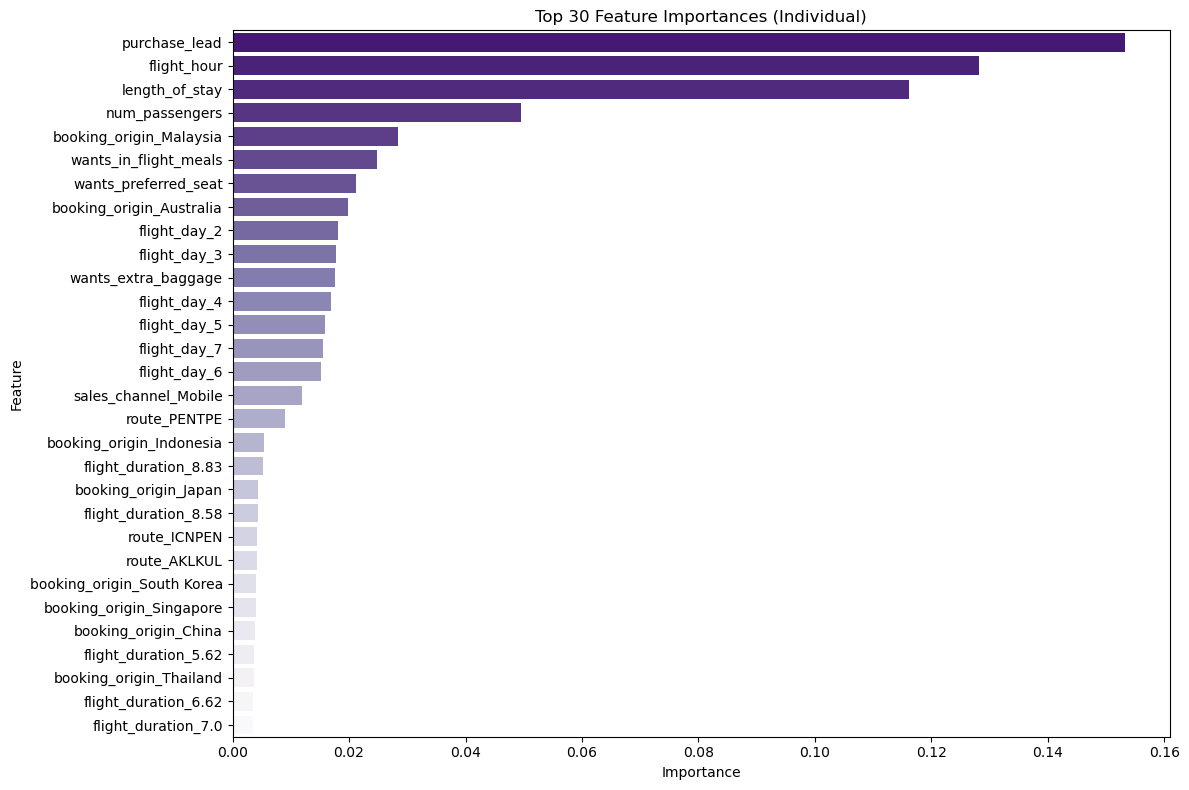

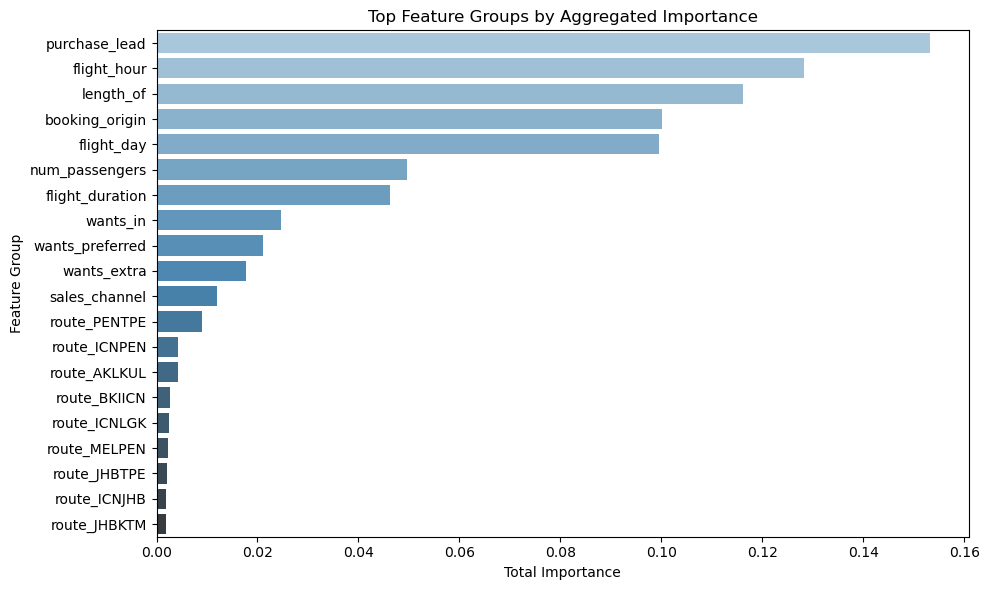

In [28]:
# Get feature importances from trained Random Forest model
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort individual feature importances
feature_importances = feature_importances.sort_values('importance', ascending=False)

# --- Step 1: Plot Top 30 Individual Features ---
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(30), palette='Purples_r')
plt.title('Top 30 Feature Importances (Individual)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Step 2: Group by Base Feature Name ---
# This assumes feature names like booking_origin_Malaysia, flight_day_2, etc.
# Modify the regex if your feature names are structured differently
feature_importances['base_feature'] = feature_importances['feature'].str.extract(r'^([a-zA-Z]+(?:_[a-zA-Z]+)?)')

grouped_importances = feature_importances.groupby('base_feature')['importance'].sum().reset_index()
grouped_importances = grouped_importances.sort_values('importance', ascending=False)

# --- Step 3: Plot Grouped Feature Importances ---
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='base_feature', data=grouped_importances.head(20), palette='Blues_d')
plt.title('Top Feature Groups by Aggregated Importance')
plt.xlabel('Total Importance')
plt.ylabel('Feature Group')
plt.tight_layout()
plt.show()


## Cross-Validation 

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
# 1. Load your dataset
df = pd.read_csv("customer_booking.csv", encoding='latin-1')
y = df['booking_complete']

# 2. Select features
X = df[['purchase_lead', 'num_passengers', 'flight_hour', 'flight_day', 'trip_type',
        'route', 'sales_channel', 'length_of_stay', 'flight_duration',
        'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
        'wants_in_flight_meals']]

# 3. One-hot encode categorical features
X = pd.get_dummies(X, columns=['flight_day', 'trip_type', 'route', 'sales_channel', 'booking_origin'], drop_first=True)

# 4. Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    y_preds = model.predict(X_test)
    
    auc = roc_auc_score(y_test, y_probs)
    auc_scores.append(auc)
    
    print("Fold Classification Report:\n", classification_report(y_test, y_preds))

print("Mean AUC-ROC Score:", np.mean(auc_scores))


Fold Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8505
           1       0.49      0.12      0.19      1495

    accuracy                           0.85     10000
   macro avg       0.67      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000

Fold Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8505
           1       0.49      0.12      0.19      1495

    accuracy                           0.85     10000
   macro avg       0.68      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000

Fold Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.53      0.13      0.20      1496

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.

### Hypertuning

#### Since the AUC-ROC score is 0.78 — above the baseline of 0.5 — the model does effectively distinguish between completed and abandoned bookings.

#### Using only one feature (like purchase_lead) may give a high accuracy, but it oversimplifies the problem and risks overfitting. By including multiple features and tuning the model with cross-validation, we build a more balanced and generalizable model. This process helps ensure that the model performs well not just on the current data, but also on new, unseen cases—making it more reliable for real-world use.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Select features and target
X = df[['purchase_lead', 'num_passengers', 'flight_hour', 'flight_day', 'trip_type', 'route', 'sales_channel']]
y = df['booking_complete']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['flight_day', 'trip_type', 'route', 'sales_channel'], drop_first=True)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           verbose=1,
                           n_jobs=-1)

# Fit GridSearch on training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model on the test set
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC on Test Set:", test_auc)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


# Summary of Findings – British Airways Booking Completion Analysis
### This project analyzed 50,000 customer booking records to understand what drives booking completion on the British Airways platform. Using a Random Forest model (accuracy ~85%) and 70% for multiple features, the top factors influencing whether a customer completes a booking were:

Purchase Lead (how early the booking is made): most influential

Flight Hour (time of flight)

Length of Stay

Number of Passengers

Booking Origin (specific countries stood out)

Customers who booked further in advance, selected earlier flight hours, and had longer stays or more passengers were significantly more likely to complete their bookings.

Model accuracy was high, the AUC-ROC score (0.78), suggesting the model predict the outcome well. 

#  Business Recommendation

Since purchase_lead is the strongest predictor, British Airways should:

Identify early planners (e.g., 40+ days in advance) and proactively engage them with:

Reminders to complete bookings

Loyalty incentives or personalized offers

Bundled upsells: Offer travel insurance, preferred seats, or meals at a discount to lock in commitment early

Travel insurance or extras like seats/meals to increase commitment

Additionally, flights with early departure hours and longer trip durations show higher conversion. These can be featured more prominently in marketing and search results.

The sales_channel_Mobile feature appears among the top predictors, suggesting platform choice may influence conversions, perhaps to look into streamlining UX and set up checkout reminders. 
Lastly, by combining behavioral insights with country-level booking patterns, targeted regional campaigns can be launched in high-performing markets (e.g., Malaysia showed significance in the model).
